In [4]:
import pickle
import pandas as pd

In [5]:
with open('data/pickles/testdf21.p', 'rb') as readfile: 
    testdf21 = pickle.load(readfile)
    
with open('data/pickles/testdf20.p', 'rb') as readfile: 
    testdf20 = pickle.load(readfile)
    
with open('data/pickles/testdf19.p', 'rb') as readfile: 
    testdf19 = pickle.load(readfile)
    
with open('data/pickles/testdf18.p', 'rb') as readfile: 
    testdf18 = pickle.load(readfile)
    
with open('data/pickles/testdf17.p', 'rb') as readfile: 
    testdf17 = pickle.load(readfile)

In [6]:
testdf21.dropna(inplace=True)

In [75]:
testdf21['O/U'] = testdf21['Over/Under Result'].map({'Over' : 1, 'Under': -1, 'Push': 0})

In [8]:
list(testdf21.columns)

['TEAM_ID_Home',
 'Team_Home',
 'GAME_ID',
 'GAME_DATE',
 'MATCHUP_Home',
 'Over/Under',
 'Spread_Home',
 'ML_Home',
 'WL_Home',
 'Spread_Result_Home',
 'PTS_Home',
 'PLUS_MINUS_Home',
 'WIN_Home',
 'LOSS_Home',
 'WINS_SEASON_Home',
 'LOSS_SEASON_Home',
 'WIN_%_Home',
 'previous_day_Home',
 'back_to_back_Home',
 'FG_PCT_Home',
 'FG3_PCT_Home',
 'FT_PCT_Home',
 'EFG_PCT_y_Home',
 'FTA_RATE_Home',
 'TM_TOV_PCT_y_Home',
 'OREB_PCT_y_Home',
 'OPP_EFG_PCT_Home',
 'OPP_FTA_RATE_Home',
 'OPP_TOV_PCT_Home',
 'OPP_OREB_PCT_Home',
 'PIE_Home',
 'OFF_RATING_Home',
 'DEF_RATING_Home',
 'NET_RATING_Home',
 'TS_PCT_Home',
 'PACE_Home',
 'AST_TOV_Home',
 'HOME_TEAM_Home',
 'PTS_ALLOWED_Home',
 'PTS LAST 5_Home',
 'PLUS_MINUS LAST 5_Home',
 'FG_PCT LAST 5_Home',
 'FG3_PCT LAST 5_Home',
 'FT_PCT LAST 5_Home',
 'EFG_PCT_y LAST 5_Home',
 'FTA_RATE LAST 5_Home',
 'TM_TOV_PCT_y LAST 5_Home',
 'OREB_PCT_y LAST 5_Home',
 'OPP_EFG_PCT LAST 5_Home',
 'OPP_FTA_RATE LAST 5_Home',
 'OPP_TOV_PCT LAST 5_Home',
 'OP

In [37]:
ou_columns = ['Over/Under', 'PTS LAST 10_Home', 'EFG_PCT_y LAST 10_Home',
 'FTA_RATE LAST 10_Home',
 'TM_TOV_PCT_y LAST 10_Home',
 'OREB_PCT_y LAST 10_Home',
 'OPP_EFG_PCT LAST 10_Home',
 'OPP_FTA_RATE LAST 10_Home',
 'OPP_TOV_PCT LAST 10_Home',
 'OPP_OREB_PCT LAST 10_Home',
  'PACE LAST 10_Home',
   'PACE Home_Home',
'OFF_RATING Season_Home',
'PTS Season_Home',
    'back_to_back_Home',
'PTS_ALLOWED LAST 10_Home',
'PTS_ALLOWED Home_Home',
    'PTS LAST 10_Away',
   'EFG_PCT_y LAST 10_Away',
 'FTA_RATE LAST 10_Away',
 'TM_TOV_PCT_y LAST 10_Away',
 'OREB_PCT_y LAST 10_Away',
 'OPP_EFG_PCT LAST 10_Away',
 'OPP_FTA_RATE LAST 10_Away',
 'OPP_TOV_PCT LAST 10_Away',
 'OPP_OREB_PCT LAST 10_Away',
   'PACE LAST 10_Away',
    'OFF_RATING Season_Away',
    'PTS Season_Away',
    'PACE Away_Away',
   'back_to_back_Away',
'PTS_ALLOWED Away_Away',
'PTS_ALLOWED LAST 10_Away']

In [38]:
X = testdf21[ou_columns]
y = testdf21.TOTAL_PTS

In [76]:
X = testdf21[ou_columns]
y = testdf21['O/U']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [41]:
rfr = RandomForestRegressor(n_estimators=1000)

In [78]:
rfc = RandomForestClassifier(n_estimators=1000)

In [82]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [83]:
y_pred = rfc.predict(X_test)

In [91]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

/Users/dillmedd/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [92]:
y_pred_lr =lr.predict(X_test)

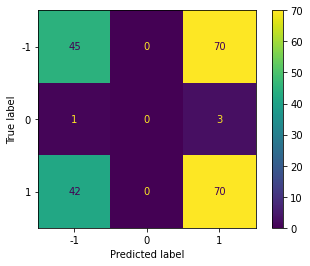

In [85]:
plot_confusion_matrix(rfc, X_test, y_test)

In [87]:
accuracy_score(y_test, y_pred)

0.49783549783549785

In [93]:
accuracy_score(y_test, y_pred_lr)

0.49783549783549785

In [44]:
y_test_ous = []
y_test_results = []
for ind in y_test.index:
    y_test_ous.append(testdf21['Over/Under'][ind])
    y_test_results.append(testdf21['Over/Under Result'][ind])

In [45]:
pred_diffs = y_pred - y_test_ous

In [46]:
model_suggestions = []
for n in pred_diffs:
    if n > 0:
        model_suggestions.append('Over')
    if n < 0:
        model_suggestions.append('Under')
        

In [47]:
suggestionsdf = pd.DataFrame({'model': model_suggestions, 'actual': y_test_results})

In [58]:
suggestionsdf

,model,actual
0,Over,Under
1,Over,Under
2,Over,Under
3,Under,Under
4,Over,Over
...,...,...
226,Over,Over
227,Over,Over
228,Over,Over
229,Over,Over


In [65]:
for ind in list(suggestionsdf.index):
    if suggestionsdf.model[ind] == suggestionsdf.actual[ind]:
        suggestionsdf['result'][ind] = "Win"
    else:
        suggestionsdf['result'][ind] = 'Lose'
    

In [68]:
suggestionsdf.result.value_counts()

Win     116
Lose    115
Name: result, dtype: int64

In [62]:
list(suggestionsdf.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
